<a href="https://colab.research.google.com/github/SurajLahariya/ML-projects/blob/main/Student_performance_ML_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Outline

some EDA

Data Preprocessing: Column transfer

Model Builing: Pipeline

Model Selection: GridSearchCV

Save model: Joblib

Make Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from lightgbm import LGBMRegressor

In [3]:
url = 'https://raw.githubusercontent.com/rachittoshniwal/ML-projects/main/student%20marks/StudentsPerformance.csv'

In [4]:
df = pd.read_csv(url)

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.shape

(1000, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [8]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [9]:
scores = df.columns[df.columns.str.contains('score')].tolist()
scores

['math score', 'reading score', 'writing score']

In [10]:
for cols in df.columns:
  print (cols)

gender
race/ethnicity
parental level of education
lunch
test preparation course
math score
reading score
writing score


EDA

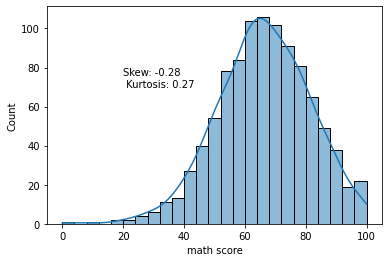

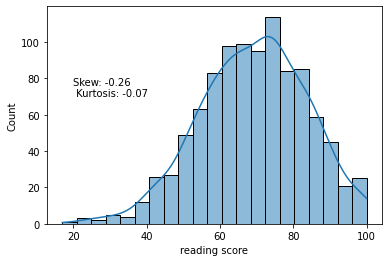

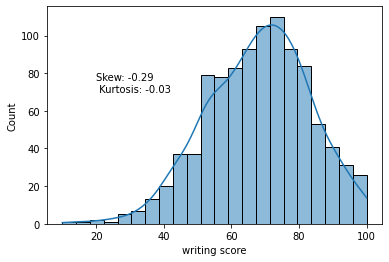

In [11]:
for score in scores:
  sns.histplot(df[score], kde='True')
  plt.text(x=20,y=70, s=f"Skew: {round(df[score].skew(),2)}\n Kurtosis: {round(df[score].kurt(),2)}")
  plt.show()

In [12]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Pairplot

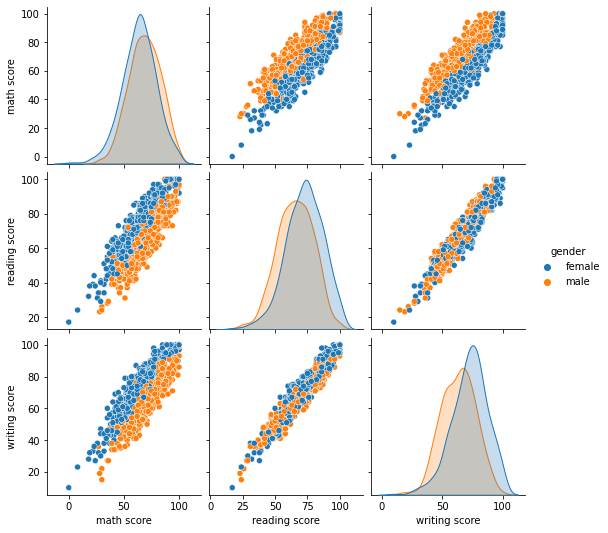

In [13]:
sns.pairplot(data=df, hue='gender')

scores vs lunch type:

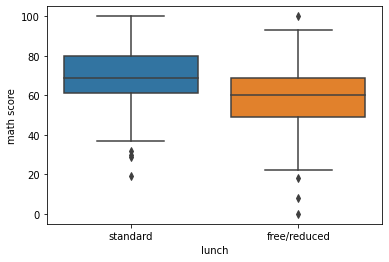

<Figure size 720x7200 with 0 Axes>

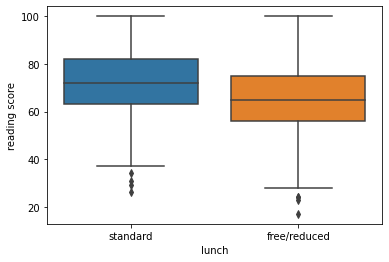

<Figure size 720x7200 with 0 Axes>

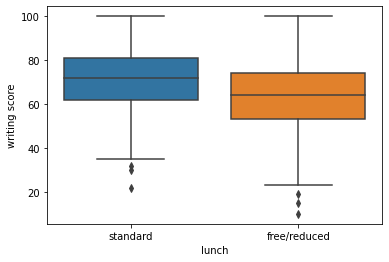

<Figure size 720x7200 with 0 Axes>

In [14]:
for score in scores:
  sns.boxplot(y=df[score], x=df['lunch'])
  plt.figure(figsize=(10,100))
  plt.show()

scores vs race/ ethnicity group:

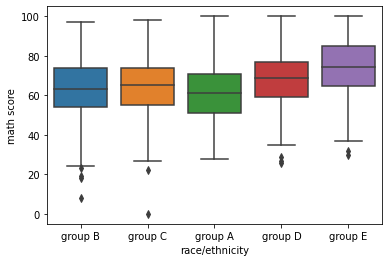

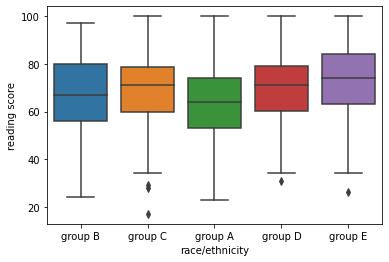

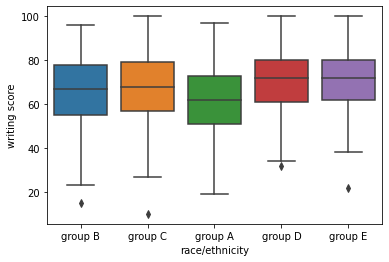

In [15]:
for score in scores:
  sns.boxplot(y=df[score], x=df['race/ethnicity'])
  plt.show()

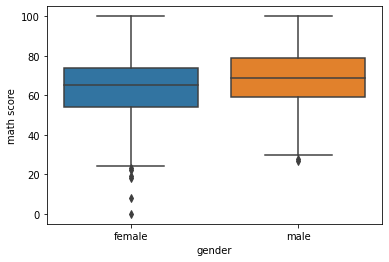

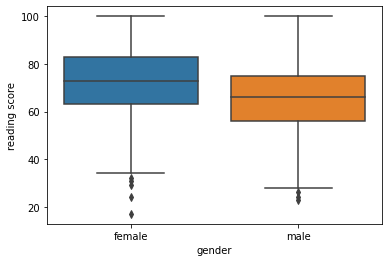

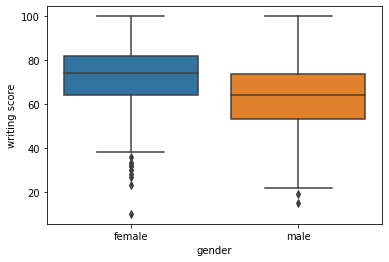

In [16]:
for score in scores:
    sns.boxplot(y=df[score], x=df['gender'])
    plt.show()

scores vs whether completed the test prep course:

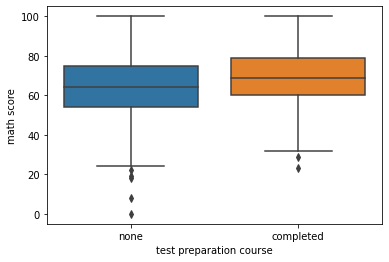

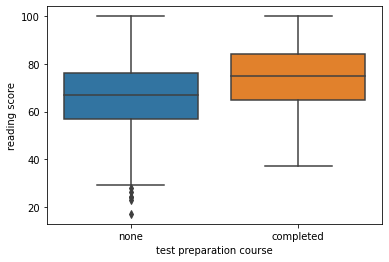

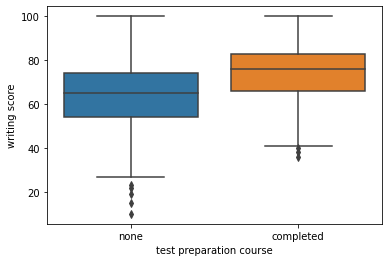

In [17]:
for score in scores:
    sns.boxplot(y=df[score], x=df['test preparation course'])
    plt.show()

scores vs parental education level:

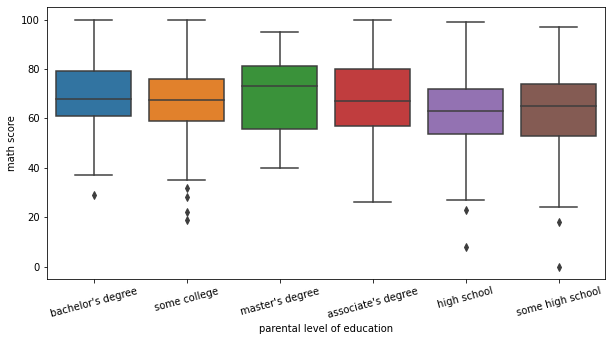

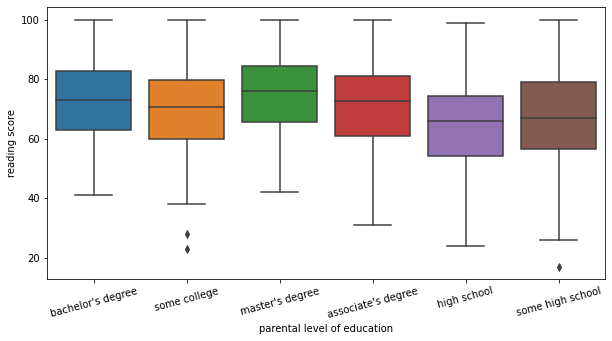

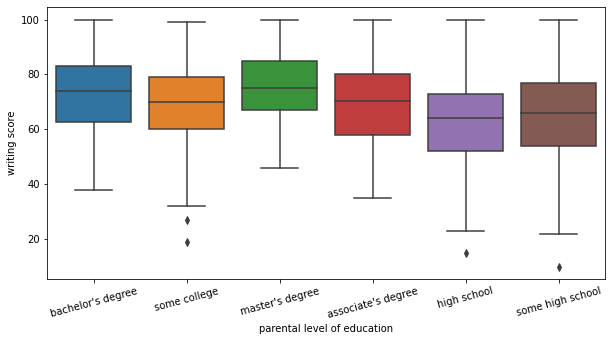

In [18]:
for score in scores:
  plt.figure(figsize=(10,5))
  sns.boxplot(x=df['parental level of education'], y=df[score])
  plt.xticks(rotation=15)
  plt.show()

In [19]:
X, y = df.drop('writing score', axis = 1), df['writing score']

In [22]:
cat_cols = [cols for cols in df.columns if df[cols].dtype == 'O']
cat_cols

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course']

In [23]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [26]:
ct = ColumnTransformer([
    ('num', StandardScaler(), ['math score', 'reading score',]),
    ('cat', OneHotEncoder(sparse=False, handle_unknown='ignore'), cat_cols)
], remainder='passthrough')

In [27]:
ct.fit_transform(X)

array([[ 0.39002351,  0.19399858,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 0.19207553,  1.42747598,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.57771141,  1.77010859,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [-0.46775108,  0.12547206,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.12609287,  0.60515772,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 0.71993682,  1.15336989,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [28]:
pipe = Pipeline([
    ('trf', ct),
    ('model', LGBMRegressor(random_state=10))
])

In [29]:
params = {
    'model__n_estimators': [100,130,150,170,190],
    'model__boosting_type': ['dart','gbdt','goss']
}

In [31]:
gs = GridSearchCV(estimator=pipe, param_grid=params, scoring='neg_root_mean_squared_error', n_jobs=-1)

In [32]:
gs.fit(X,y)

GridSearchCV(estimator=Pipeline(steps=[('trf',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['math '
                                                                          'score',
                                                                          'reading '
                                                                          'score']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore',
                                                                                       sparse=False),
                                                                      

In [33]:
gs.best_estimator_

Pipeline(steps=[('trf',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['math score',
                                                   'reading score']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['gender', 'race/ethnicity',
                                                   'parental level of '
                                                   'education',
                                                   'lunch',
                                                   'test preparation '
                                                   'course'])])),
                ('model', LGBMRegressor(random_state=10))])

In [34]:
gs.best_params_

{'model__boosting_type': 'gbdt', 'model__n_estimators': 100}

In [35]:
gs.best_score_

-3.9932092796716128

In [37]:
import joblib

In [38]:
joblib.dump(gs.best_estimator_, 'model.joblib')

['model.joblib']

importing the model:

In [42]:
mdl = joblib.load('model.joblib')

In [40]:
#Making predictions on a new data point NOT seen by the model

In [41]:
q = pd.DataFrame([['female', 'group A', 'high school', 'standard', 'completed', 50,87]],
             columns=X.columns)
q

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score
0,female,group A,high school,standard,completed,50,87


In [43]:
mdl.predict(q)

array([81.87659159])